### BASIC INFO AND NOTES ON THE DATASET ###


1. **age**: in years

2. **sex**: (1 = male; 0 = female)

3. **cp**: chest pain type 
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic 

4. **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)

5. **chol**: serum cholestoral in mg/dl

6. **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. **restecg**: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

8. **thalach**: maximum heart rate achieved

9. **exang**: exercise induced angina (1 = yes; 0 = no)

10. **oldpeak**: ST depression induced by exercise relative to rest

11. **slope**: the slope of the peak exercise ST segment
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping 

12. **ca**: number of major vessels (0-3) colored by flourosopy

13. **thal**: 
    * Value 3 : normal
    * Value 6 : fixed defect
    * Value 7 : reversable defect

14. **target**: 
    * Value 0 : not target
    * Value 1 : target

In [1]:
import pandas as pd
import numpy as np

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, \
                    discriminant_analysis, gaussian_process
import xgboost as xgb

#Common Model Helpers
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn import feature_selection, model_selection, metrics

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('whitegrid')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\kovus\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Gather Data

In [2]:
# import os
# import zipfile
# from urllib.request import urlretrieve

# HEART_URL = 'https://www.kaggle.com/ronitf/heart-disease-uci/download'
# filename = 'C:/Users/kovus/Documents/Projects/heart_uci/data/heart-disease-uci.zip'
# def get_heart_data(filename=filename, url=HEART_URL, force_download=False):
#     if force_download or not os.path.exists(filename):
#         urlretrieve(url, filename)
#         print('Downloaded')
    
#     zf = zipfile.ZipFile('C:/Users/kovus/Documents/Projects/heart_uci/data/heart-disease-uci.zip') 
#     data = pd.read_csv(zf.open('heart.csv'))
#     return data

In [3]:
# read in the data from local folder
data = pd.read_csv('C:/Users/kovus/Documents/Projects/heart_uci/data/heart.csv')

# make a copy of retrieved data
df = data.copy()

# take a look at first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Check Data

In [4]:
# import pandas_profiling
# pandas_profiling.ProfileReport(df)

In [5]:
# Are there any missing values?
print('There is(are) {} total missing values in dataset'.format(df.isnull().sum().sum()))

# Are there any duplicated samples?
print('There is(are) {} duplicated rows in dataset'.format(df.duplicated().sum()))

There is(are) 0 total missing values in dataset
There is(are) 1 duplicated rows in dataset


In [6]:
# make sure it is a duplicate
df.loc[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [7]:
# drop duplicated row
df.drop_duplicates(keep='first', inplace=True)

In [8]:
# preview information on features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [9]:
# statistical information on features
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Preprocess Data

In [10]:
# define target vector (y)
y = df['target']

# define features matrix (X)
X = df.drop('target', axis=1)

# separate categorical features(discrete)
cat_cols = X.columns[X.nunique() <= 10]

# separate ordinal columns(continous)
ord_cols = X.columns[X.nunique() > 10]

In [11]:
# look at the sizes of features matrix and target vector
print(f'X: {X.shape}, y: {y.shape}')

X: (302, 13), y: (302,)


In [12]:
print(f'Categorical features:{cat_cols}\nOrdinal features:{ord_cols}')

Categorical features:Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], dtype='object')
Ordinal features:Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')


In [13]:
def get_sample_data(X=X, y=y):
    """Takes in X and y and performs the following:
    1. One-Hot Encodes(Dummy variables) categorical features
    2. Splits X and y into training and testing sets
    3. Standardizes features for better model performance
    4. Returns X_train, X_test, y_train, y_test
    
    Parameters:
    ----------
    X : Pandas DataFrame(default: user-defined feature matrix)
    y : Pandas Series(defalt: user-defined target vector)
    
    Returns:
    X_train: Pandas DataFrame, X training set
    X_test: Pandas DataFrame, X testing set
    y_train: Pandas Series, y training set
    y_test: Pandas Series, y testing set
    """

    # cast categorical features as type category
    for col in cat_cols:
        X = X.astype({col:'category'})

    # get dummy variables
    X = pd.get_dummies(X, drop_first=True)
    
    # rename dummy columns
    X.rename(columns={'sex_1':'sex_male', 'fbs_1':'fbs_pos', 'exang_1':'exang_pos'}, inplace=True)
    
    # split X and y into training and testing sets
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=43)
    
    # standardize training and testing sets separately to avoid data leakage
    sca = StandardScaler()
    X_train.loc[:, ord_cols] = sca.fit_transform(X_train.loc[:, ord_cols])
    X_test.loc[:, ord_cols] = sca.fit_transform(X_test.loc[:, ord_cols])
    
    return X_train, X_test, y_train, y_test

In [14]:
X_train, X_test, y_train, y_test = get_sample_data()
print(f'X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}')

X_train: (211, 22)
y_train: (211,)
X_test: (91, 22)
y_test: (91,)


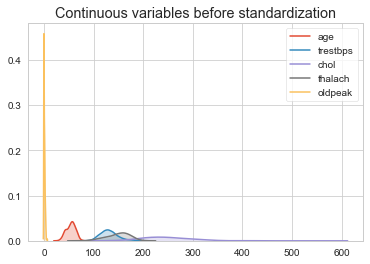

In [15]:
for col in ord_cols:
    sns.kdeplot(data=df[col], shade=True)
    plt.title('Continuous variables before standardization')

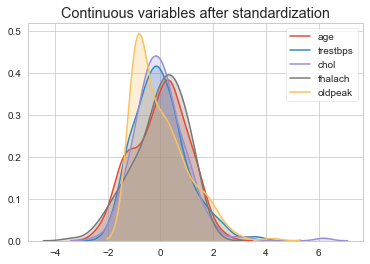

In [16]:
for col in ord_cols:
    sns.kdeplot(data=X_train[col], shade=True)
    plt.title('Continuous variables after standardization')

In [17]:
# concatenate training and testing set after normalization to avoid data leakage
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)
X.shape, y.shape

((302, 22), (302,))

### Explore Data

### Imbalanced Classes

In [18]:
# how many unique values our features have?
pd.DataFrame({'Feature':df.nunique().index, 'Unique values':df.nunique().values})

,Feature,Unique values
0,age,41
1,sex,2
2,cp,4
3,trestbps,49
4,chol,152
5,fbs,2
6,restecg,3
7,thalach,91
8,exang,2
9,oldpeak,40


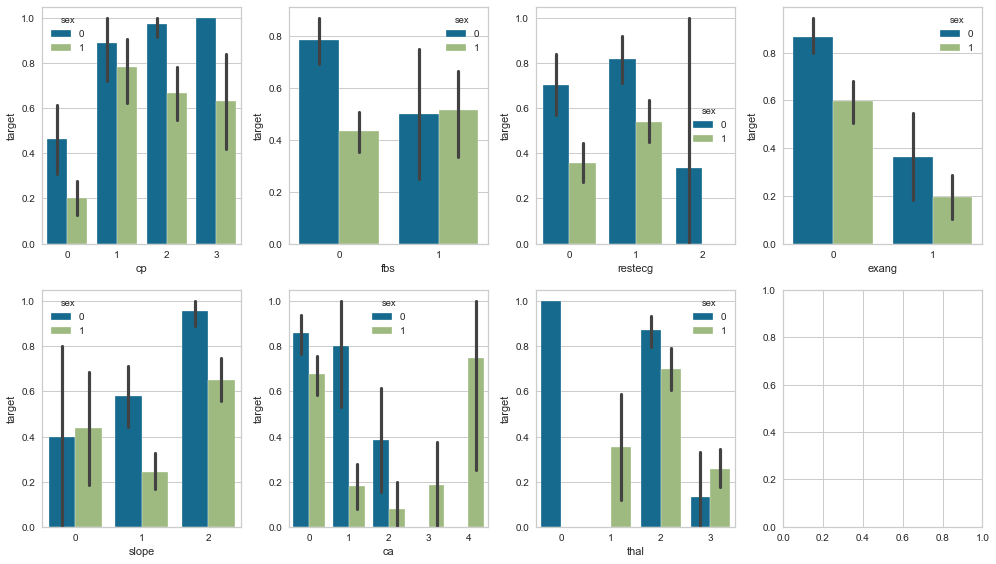

In [60]:
# graph individual features
fig, saxis = plt.subplots(2, 4, figsize = (14, 8))

# sns.barplot(x='sex', y='target', hue='sex', data=df, ax=saxis[0,0])
sns.barplot(x='cp', y='target', hue='sex', data=df, ax=saxis[0,0])
sns.barplot(x='fbs', y='target', hue='sex', data=df, ax=saxis[0,1])
sns.barplot(x='restecg', y='target', hue='sex', data=df, ax=saxis[0,2])
sns.barplot(x='exang', y='target', hue='sex', data=df, ax=saxis[0,3])
sns.barplot(x='slope', y='target', hue='sex', data=df, ax=saxis[1,0])
sns.barplot(x='ca', y='target', hue='sex', data=df, ax=saxis[1,1])
sns.barplot(x='thal', y='target', hue='sex', data=df, ax=saxis[1,2])

plt.tight_layout();

In [20]:
# categorical(discrete) variable correlation by using target
for col in cat_cols:
    print('Target Correlation by:', col)
    print(df[[col, 'target']].groupby(col).mean())
    print('-'*25, '\n')

Target Correlation by: sex
       target
sex          
0    0.750000
1    0.446602
------------------------- 

Target Correlation by: cp
      target
cp          
0   0.272727
1   0.820000
2   0.790698
3   0.695652
------------------------- 

Target Correlation by: fbs
       target
fbs          
0    0.548638
1    0.511111
------------------------- 

Target Correlation by: restecg
           target
restecg          
0        0.462585
1        0.629139
2        0.250000
------------------------- 

Target Correlation by: exang
         target
exang          
0      0.694581
1      0.232323
------------------------- 

Target Correlation by: slope
         target
slope          
0      0.428571
1      0.350000
2      0.751773
------------------------- 

Target Correlation by: ca
      target
ca          
0   0.742857
1   0.323077
2   0.184211
3   0.150000
4   0.750000
------------------------- 

Target Correlation by: thal
        target
thal          
0     0.500000
1     0.333333
2     

**Inference from Target Correlation**

**Assuming the sample **truly represents** the population** :
- It is 75% likely that you have heart disease if you are **female**.
- It is 69-82% likely that you have heart disease if you have **atypical angina, non-anginal pain asymptomatic chest pain**.
- Level of fasting blood sugar isn't indicative of a presence of heart disease.
- It is 63% likely that you have heart disease if your resting electrocardiographic result is **"having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)"**.
- It is 69% likely that you have heart disease if you **get execised induced angina**. 
- It is 75% likely that you have heart disease if the slope of the **peak exercise ST segment is downsloping**.
- It is 78-82% likely that you have heart disease if you downsloping 
- It is 78% likely that you have heart disease if your thal is of **fixed defect type**.


In [21]:
#using crosstabs
for col in cat_cols:
    print('Target Crosstab by:', col)
    print(pd.crosstab(df[col], df['target']))
    print('-'*25, '\n')

Target Crosstab by: sex
target    0   1
sex            
0        24  72
1       114  92
------------------------- 

Target Crosstab by: cp
target    0   1
cp             
0       104  39
1         9  41
2        18  68
3         7  16
------------------------- 

Target Crosstab by: fbs
target    0    1
fbs             
0       116  141
1        22   23
------------------------- 

Target Crosstab by: restecg
target    0   1
restecg        
0        79  68
1        56  95
2         3   1
------------------------- 

Target Crosstab by: exang
target   0    1
exang          
0       62  141
1       76   23
------------------------- 

Target Crosstab by: slope
target   0    1
slope          
0       12    9
1       91   49
2       35  106
------------------------- 

Target Crosstab by: ca
target   0    1
ca             
0       45  130
1       44   21
2       31    7
3       17    3
4        1    3
------------------------- 

Target Crosstab by: thal
target   0    1
thal           
0        

### Ordinal Values

### Correlation

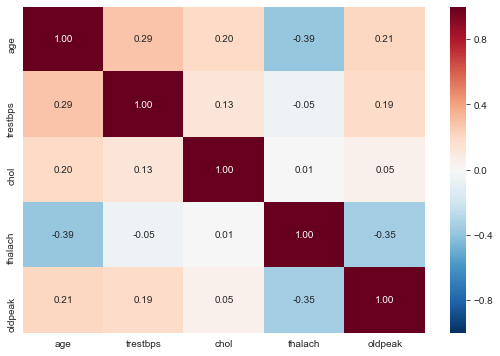

In [22]:
# correlation among ordinal(continuous) variables
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(X.loc[:, ord_cols].corr(), fmt='.2f', annot=True, ax=ax, cmap='RdBu_r', vmin=-1, vmax=1);

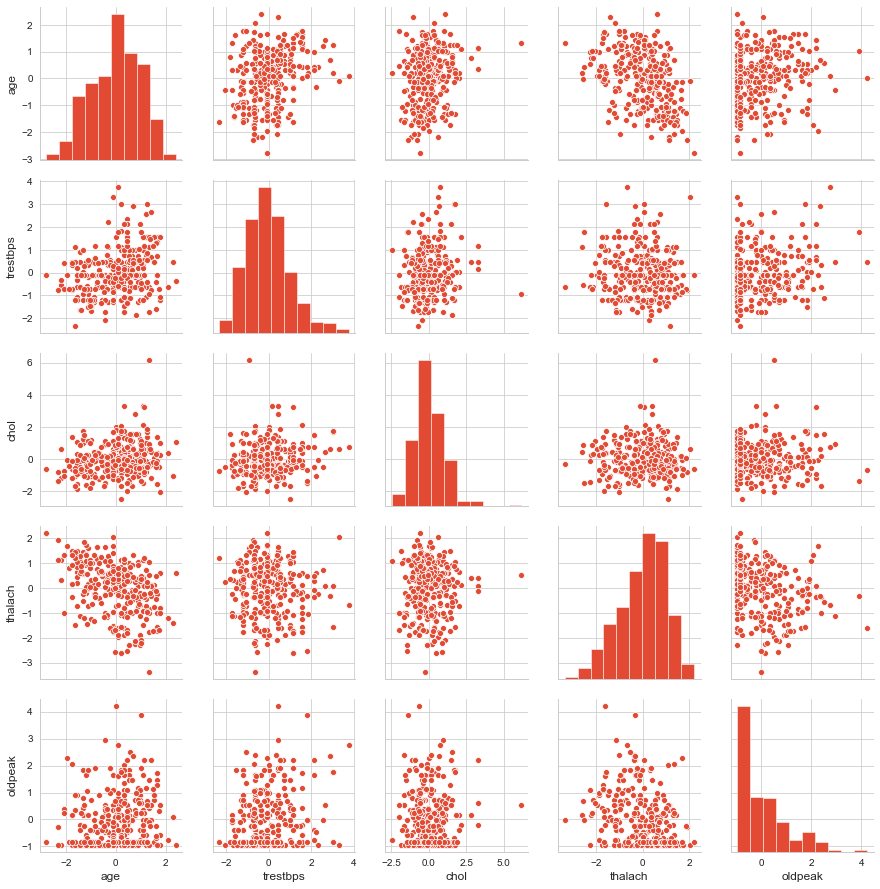

In [23]:
sns.pairplot(X.loc[:, ord_cols]);

**Inference:** 
- There seems to be a weak negative correlation between age and maximum heart rate achieved.
- Looking at both correlation table and scatterplots of continuous variables there doesn't seem to be any strong correlation between any two variables in the sample. **Thus multicollinearity is highly unlikely**.

### Parallel Coordinates

In [25]:
from yellowbrick.features import ParallelCoordinates

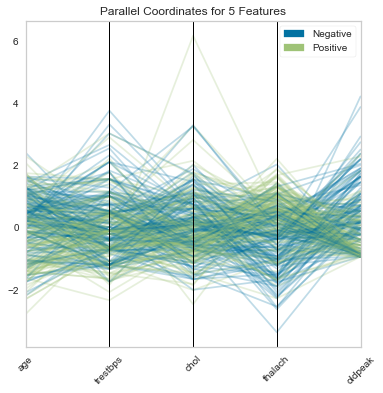

In [26]:
fig, ax = plt.subplots(figsize=(6, 6))
pc = ParallelCoordinates(classes=['Negative', 'Positive'], features=ord_cols, alpha=0.25)
pc.fit(X[ord_cols], y)
pc.transform(X[ord_cols])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
pc.poof();

Inference:

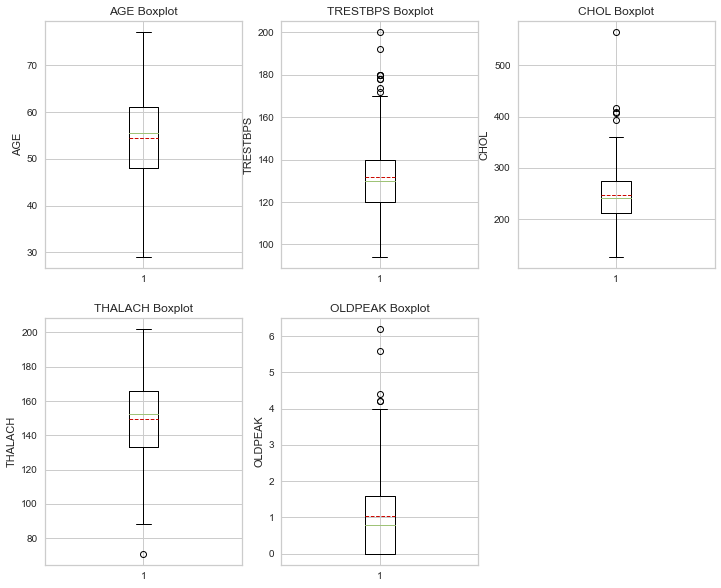

In [38]:
# boxplots for ordinal(continuous) variables
plt.figure(figsize=[12, 10])

i=0
for col in ord_cols:
    i += 1
    plt.subplot(230+i)
    plt.boxplot(x=df[col], showmeans = True, meanline = True)
    plt.title(f'{col.upper()} Boxplot')
    plt.ylabel(f'{col.upper()}')

Inference:

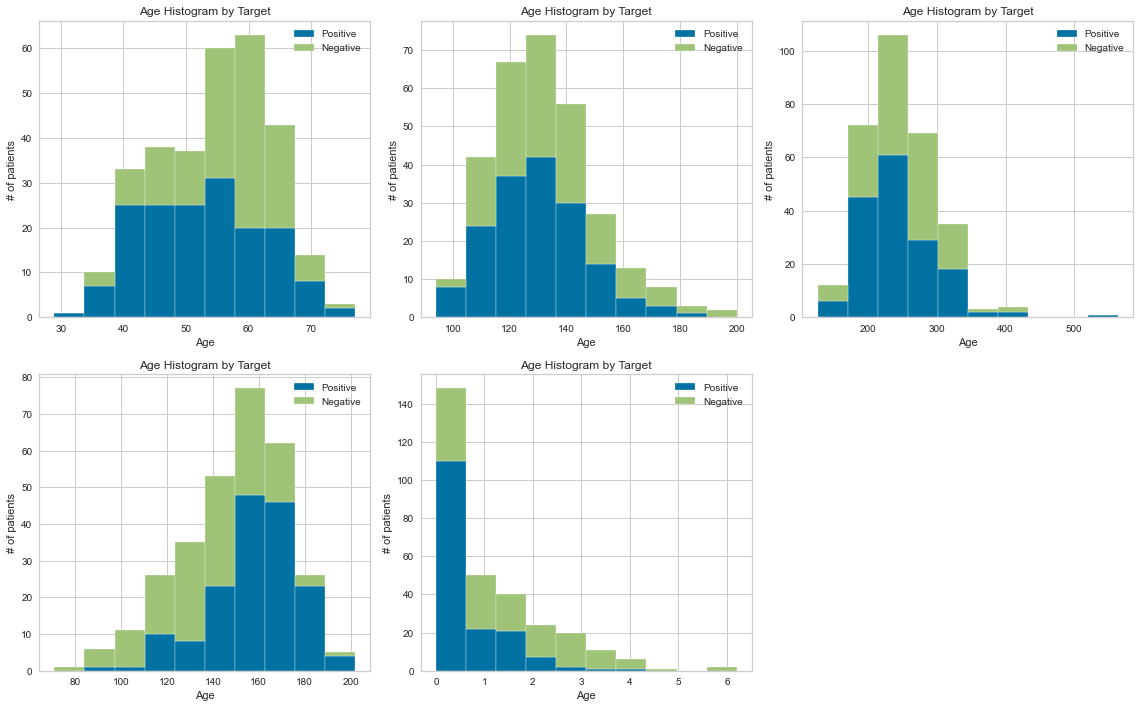

In [47]:
# graph distribution of ordinal(continuous) variables
plt.figure(figsize=(16, 10))
i = 0
for col in ord_cols:
    i += 1
    plt.subplot(230+i)
    plt.hist(x = [df[df['target']==1][col], df[df['target']==0][col]],
             stacked=True, color = ['b','g'],label = ['Positive','Negative'])
    plt.title('Age Histogram by Target')
    plt.xlabel('Age')
    plt.ylabel('# of patients')
    plt.legend();

plt.tight_layout();

<Figure size 1152x720 with 0 Axes>

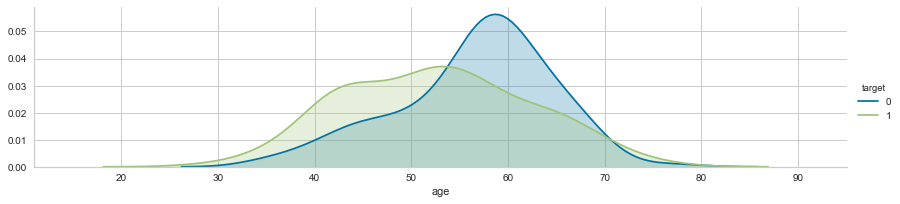

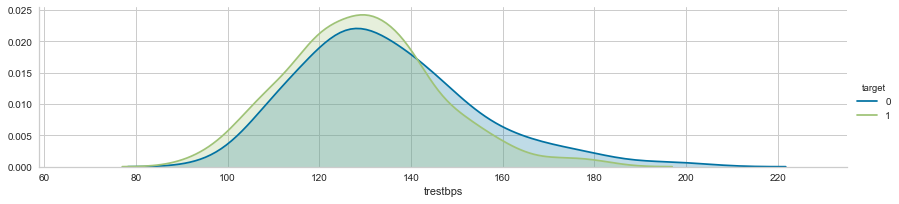

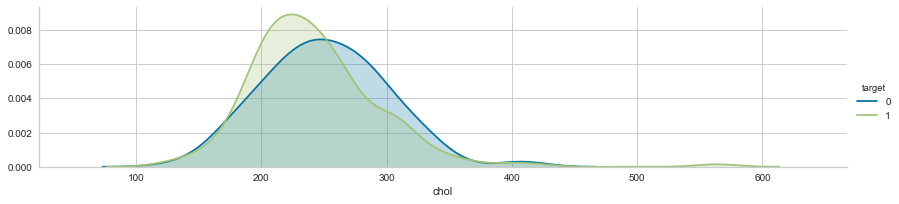

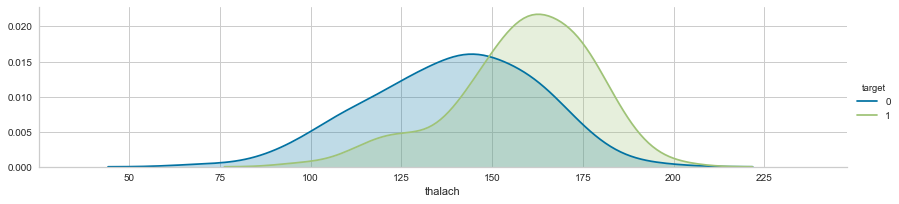

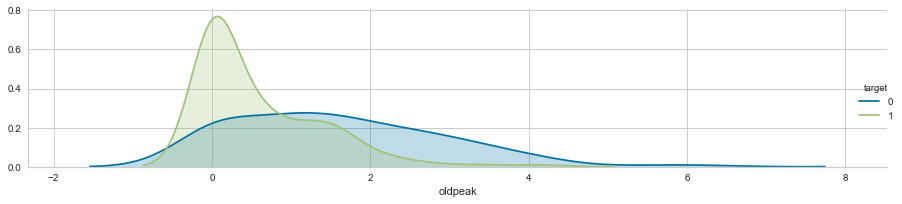

In [57]:
# graph distribution of ordinal(continuous) variables
plt.figure(figsize=(16, 10))
i = 0
for col in ord_cols:
    i += 1
    a = sns.FacetGrid(df, hue = 'target', aspect=4 )
    a.map(sns.kdeplot, col, shade= True )
    a.set(xlim=(df[col].min()-2*df[col].std() , df[col].max()+2*df[col].std()))
    a.add_legend();

plt.tight_layout();

Inference:

## Model Building

### Baseline Model

In [61]:
from sklearn.dummy import DummyClassifier
dc = DummyClassifier()
dc.fit(X_train, y_train)
dc.score(X_test, y_test)

0.5714285714285714

In [66]:
print('Precision score:', metrics.precision_score(y_test, dc.predict(X_test)))
print('F1 score:', metrics.f1_score(y_test, dc.predict(X_test)))
print('Matthews score:', metrics.matthews_corrcoef(y_test, dc.predict(X_test)))

Precision score: 0.5609756097560976
F1 score: 0.5111111111111112
Matthews score: -0.030140826880741194


### Various Families

In [64]:
for model in [DummyClassifier,
              linear_model.LogisticRegression,
              tree.DecisionTreeClassifier,
              neighbors.KNeighborsClassifier,
              naive_bayes.GaussianNB,
              svm.SVC,
              ensemble.RandomForestClassifier,
              xgb.XGBClassifier
             ]:
    classifier = model()
    kfold = model_selection.KFold(n_splits=10, random_state=43)
    score = model_selection.cross_val_score(classifier, X, y, scoring='roc_auc', cv=kfold)
    print(f'{model.__name__:25}'
          f'AUC: {score.mean():.3f} STD: {score.std():.3f}')

DummyClassifier          AUC: 0.519 STD: 0.099
LogisticRegression       AUC: 0.915 STD: 0.046
DecisionTreeClassifier   AUC: 0.726 STD: 0.072
KNeighborsClassifier     AUC: 0.864 STD: 0.076
GaussianNB               AUC: 0.882 STD: 0.093
SVC                      AUC: 0.896 STD: 0.060
RandomForestClassifier   AUC: 0.878 STD: 0.081
XGBClassifier            AUC: 0.877 STD: 0.061


### Stacking

In [69]:
from mlxtend.classifier import StackingClassifier

classifiers = [x() for x in [DummyClassifier,
                             linear_model.LogisticRegression,
                             tree.DecisionTreeClassifier,
                             neighbors.KNeighborsClassifier,
                             naive_bayes.GaussianNB,
                             svm.SVC,
                             ensemble.RandomForestClassifier,
                             xgb.XGBClassifier
                            ]
              ]

# meta_classifier???
stc = StackingClassifier(classifiers=classifiers, meta_classifier=linear_model.LogisticRegression())
score = model_selection.cross_val_score(stc, X, y, scoring='roc_auc', cv=kfold)
print(f'stc.__name__:'
      f'AUC: {score.mean():.3f} STD: {score.std():.3f}')
print('Stacking doesn\'t look like it\'s worth it')

stc.__name__:AUC: 0.865 STD: 0.066
Stacking doesn't look like it's worth it


### Random Forest Classifier

In [70]:
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=43)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=43)

In [71]:
rf.score(X_test, y_test)

0.8131868131868132

In [74]:
print('Precision score:', metrics.precision_score(y_test, rf.predict(X_test)))
print('ROC_AUC score:', metrics.roc_auc_score(y_test, rf.predict(X_test)))
print('F1 score:', metrics.f1_score(y_test, rf.predict(X_test)))
print('Matthews score:', metrics.matthews_corrcoef(y_test, rf.predict(X_test)))

Precision score: 0.7796610169491526
ROC_AUC score: 0.8014634146341463
F1 score: 0.8440366972477064
Matthews score: 0.6282616423073341


In [ ]:
# Feature Importances
for col, val in sorted(zip(X_train.columns, rf.feature_importances_),
                       key = lambda x: x[1],
                       reverse=True
                      ):
    print(f'{col:10} {val:10.3f}')

In [ ]:
from yellowbrick.model_selection import FeatureImportances
fig, ax = plt.subplots(figsize=(6, 6))
rf_fi = FeatureImportances(rf)
rf_fi.fit(X, y)
rf_fi.poof();

### Optimize Model

In [76]:
rf_test = ensemble.RandomForestClassifier(random_state=43)
params = {'max_features': [0.4, 'auto'],
          'n_estimators': [15, 200],
          'min_samples_leaf': [1, 0.1],
          'random_state': [43]
         }
cv = model_selection.GridSearchCV(rf, params, n_jobs=-1).fit(X_train, y_train)
print(cv.best_params_)

{'max_features': 'auto', 'min_samples_leaf': 0.1, 'n_estimators': 200, 'random_state': 43}


In [77]:
rf_best = ensemble.RandomForestClassifier(**{'max_features': 'auto',
                                             'n_estimators': 200,
                                             'min_samples_leaf': 0.1,
                                             'random_state': 43
                                            })
rf_best.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.1, n_estimators=200, random_state=43)

In [78]:
print('Precision score:', metrics.precision_score(y_test, rf_best.predict(X_test)))
print('ROC_AUC score:', metrics.roc_auc_score(y_test, rf_best.predict(X_test)))
print('F1 score:', metrics.f1_score(y_test, rf_best.predict(X_test)))
print('Matthews score:', metrics.matthews_corrcoef(y_test, rf_best.predict(X_test)))

Precision score: 0.7868852459016393
ROC_AUC score: 0.8214634146341463
F1 score: 0.8648648648648649
Matthews score: 0.6804761917419709


#### Classification Report

In [ ]:
from yellowbrick.classifier import ClassificationReport
fig, ax = plt.subplots(figsize=(6, 4))
rf_cr = ClassificationReport(rf_best, classes=['negative', 'positive'], label_encoder={0:'negative', 1:'positive'})
rf_cr.score(X_test, y_test)
rf_cr.poof();

#### Confusion Matrix

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

fig, ax = plt.subplots(figsize=(5, 5))
cm_viz = ConfusionMatrix(rf_best, classes=['negative', 'positive'], label_encoder={0:'negative', 1:'positive'})
cm_viz.score(X_test, y_test)
cm_viz.poof();

#### ROC Curve

In [ ]:
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize=(8, 8))
roc_viz = ROCAUC(rf_best)
roc_viz.score(X_test, y_test)
roc_viz.poof();

#### Learning Curve

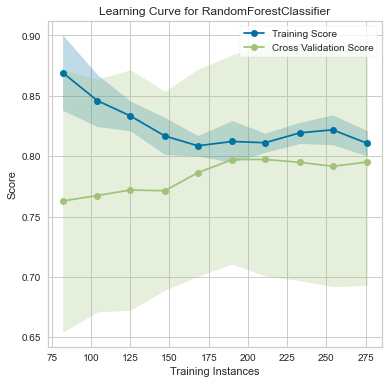

In [79]:
from yellowbrick.model_selection import LearningCurve

fig, ax = plt.subplots(figsize=(6, 6))
cv = model_selection.StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
lc_viz = LearningCurve(rf_best, cv=cv, train_sizes=sizes, scoring='f1_weighted', n_jobs=-1, ax=ax)
lc_viz.fit(X, y)
lc_viz.poof();

#### Cumulative Gains Plot

In [ ]:
import scikitplot
from scikitplot.metrics import plot_cumulative_gain

fig, ax = plt.subplots(figsize=(6, 6))
y_probas = rf_best.predict_proba(X_test)
scikitplot.metrics.plot_cumulative_gain(y_test, y_probas, ax=ax);

In [ ]:
import shap
shap.initjs()

s = shap.TreeExplainer(rf_best)
shap_vals = s.shap_values(X_test)
shap.force_plot(s.expected_value[0],
                shap_vals[0][3, :],
                feature_names=X.columns
               )


In [ ]:
shap.dependence_plot('age',
                     shap_vals[0],
                     X_test,
                     feature_names=X_test.columns,
                     alpha=0.5
                    )

In [ ]:
shap.dependence_plot('oldpeak',
                     shap_vals[0],
                     X_test,
                     feature_names=X_test.columns,
                     alpha=0.5
                    )

In [ ]:
shap.dependence_plot('chol',
                     shap_vals[0],
                     X_test,
                     feature_names=X_test.columns,
                     alpha=0.5
                    )

In [ ]:
shap.dependence_plot('trestbps',
                     shap_vals[0],
                     X_test,
                     feature_names=X_test.columns,
                     alpha=0.5
                    )

In [ ]:
shap.summary_plot(shap_vals[0], X_test)

### Logistic Regression

In [80]:
logr = linear_model.LogisticRegression(random_state=43)
logr.fit(X_train, y_train)

LogisticRegression(random_state=43)

In [81]:
logr.score(X_test, y_test)

0.8901098901098901

In [82]:
print('Precision score:', metrics.precision_score(y_test, logr.predict(X_test)))
print('ROC_AUC score:', metrics.roc_auc_score(y_test, logr.predict(X_test)))
print('F1 score:', metrics.f1_score(y_test, logr.predict(X_test)))
print('Matthews score:', metrics.matthews_corrcoef(y_test, logr.predict(X_test)))

Precision score: 0.8571428571428571
ROC_AUC score: 0.8824390243902439
F1 score: 0.9056603773584904
Matthews score: 0.7822419312619275


In [85]:
# Feature importance
for col, val in sorted(zip(X.columns, logr.coef_[0]),
                       key=lambda x: x[1],
                       reverse=True
                      ):
    print(f'{col:10}{val:10.3f}')

cp_2           1.326
cp_3           1.007
thal_2         0.798
slope_2        0.459
restecg_1      0.454
cp_1           0.394
thalach        0.345
ca_4           0.266
thal_1         0.165
restecg_2      0.137
age            0.019
fbs_pos        0.014
chol          -0.076
trestbps      -0.318
oldpeak       -0.453
slope_1       -0.491
thal_3        -0.637
sex_male      -0.652
ca_3          -0.776
exang_pos     -0.911
ca_1          -1.180
ca_2          -1.695


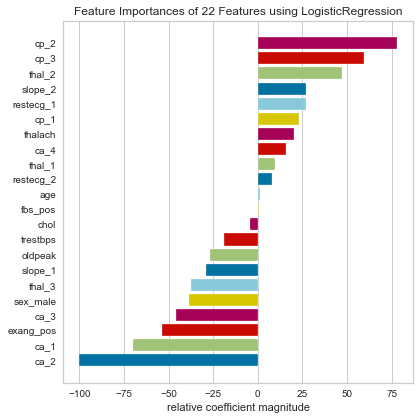

In [86]:
from yellowbrick.model_selection import FeatureImportances
fig, ax = plt.subplots(figsize=(6, 6))
logr_fi = FeatureImportances(logr)
logr_fi.fit(X, y)
logr_fi.poof();

#### Classification Report

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
logr_cr = ClassificationReport(logr, classes=['negative', 'positive'], label_encoder={0:'negative', 1:'positive'})
logr_cr.score(X_test, y_test)
logr_cr.poof();

#### Confusion Matrix

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
logr_cm = ConfusionMatrix(logr, classes=['negative', 'positive'], label_encoder={0:'negative', 1:'positive'})
logr_cm.score(X_test, y_test)
logr_cm.poof();

#### ROC Curve

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
logr_roc = ROCAUC(logr)
logr_roc.score(X_test, y_test)
logr_roc.poof();

#### Learning Curve

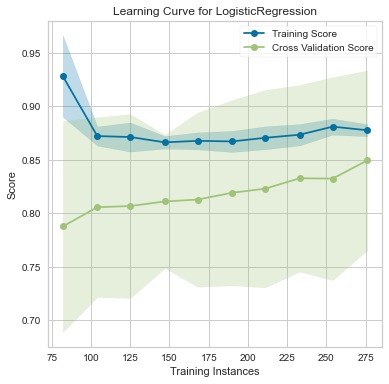

In [87]:
fig, ax = plt.subplots(figsize=(6, 6))
cv = model_selection.StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
logr_lc = LearningCurve(logr, cv=cv, train_sizes=sizes, scoring='f1_weighted', n_jobs=-1, ax=ax)
logr_lc.fit(X, y)
logr_lc.poof();

#### Cumulative Gains Plot

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
y_probas = logr.predict_proba(X_test)
scikitplot.metrics.plot_cumulative_gain(y_test, y_probas, ax=ax);

### Support Vector Classifier

In [88]:
svc = svm.SVC(random_state=43, probability=True)
svc.fit(X_train, y_train)

SVC(probability=True, random_state=43)

In [89]:
svc.score(X_test, y_test)

0.8571428571428571

In [90]:
print('Precision score:', metrics.precision_score(y_test, svc.predict(X_test)))
print('ROC_AUC score:', metrics.roc_auc_score(y_test, svc.predict(X_test)))
print('F1 score:', metrics.f1_score(y_test, svc.predict(X_test)))
print('Matthews score:', metrics.matthews_corrcoef(y_test, svc.predict(X_test)))

Precision score: 0.8245614035087719
ROC_AUC score: 0.8480487804878049
F1 score: 0.8785046728971964
Matthews score: 0.7159293322876372


#### Classification Report

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
svc_cr = ClassificationReport(svc, classes=['negative', 'positive'], label_encoder={0:'negative', 1:'positive'})
svc_cr.score(X_test, y_test)
svc_cr.poof();

#### Confusion Matrix

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
svc_cm = ConfusionMatrix(svc, classes=['negative', 'positive'], label_encoder={0:'negative', 1:'positive'})
svc_cm.score(X_test, y_test)
svc_cm.poof();

#### ROC Curve ??

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
svc_roc = ROCAUC(svc)
svc_roc.score(X_test, y_test)
svc_roc.poof();

#### Learning Curve

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
cv = model_selection.StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
svc_lc = LearningCurve(svc, cv=cv, train_sizes=sizes, scoring='f1_weighted', n_jobs=-1, ax=ax)
svc_lc.fit(X, y)
svc_lc.poof();

In [ ]:
# Seems like there is Underfitting?

#### Cumulative Gains Plot

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
y_probas = svc.predict_proba(X_test)
scikitplot.metrics.plot_cumulative_gain(y_test, y_probas, ax=ax);

### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(random_state=43)
X_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

In [ ]:
pca.components_[0]

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(pca.explained_variance_ratio_)
ax.set(xlabel='Component',
       ylabel='% of Explained Variance',
       title='Scree Plot',
       ylim=(0, 1),
       xlim=(0, 10)
      );

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set(xlabel='Component',
       ylabel='% of Explained Variance',
       title='Cumulative Variance',
       ylim=(0, 1)
      );

### Feature Selection

In [ ]:
# from rfpimp import *
# rfpimp.plot_dependence_heatmap(feature_dependence_matrix(X_train),
#                                value_fontsize = 12,
#                                label_fontsize = 14,
#                                figsize=(8,8),
#                                sn
#                               )
# fig = plt.gcf()

### RFE

In [ ]:
from yellowbrick.features import RFECV
fig, ax = plt.subplots(figsize=(8 ,8))
rfe = RFECV(ensemble.RandomForestClassifier(n_estimators=100), cv=5)
rfe.fit(X, y)
rfe.poof();

In [ ]:
rfe.rfe_estimator_.ranking_

In [ ]:
rfe.rfe_estimator_.n_features_

In [ ]:
X.columns[rfe.rfe_estimator_.support_]

### Mutual Information

In [ ]:
mic = feature_selection.mutual_info_classif(X, y)
fig, ax = plt.subplots(figsize=(6, 6))
pd.DataFrame({'feature':X.columns, 'vimp':mic}).set_index('feature').plot.barh(ax=ax);